# Extract the MS2 scan and do signature neutral loss search
- run multiple files
- need to define a precursor target list & scan range (let's just try to do more inclusive one)

In [1]:
# !pip install pymzml
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pymzml
import os
import pandas as pd
import sys

In [3]:
sys.path.append('../pyutils/')  # add the second parent directory
from searchMS2 import *

In [4]:
# spectrum.selected_precursors
# [{'mz': 417.320373535156, 'charge': 1, 'precursor id': '2'}]

In [5]:
dir_path = "../../../../MS_MS_raw_mzML/AX_RPneg_TDcells/mzML/"
files_and_dirs = os.listdir(dir_path)

# Get the full path for each file/directory in the list
infiles = [os.path.join(dir_path, file) for file in files_and_dirs]

In [6]:
exps = []
for infile in infiles:
    exps.append(pymzml.run.Reader(infile))

[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False


## Basic information - using the first instance

In [7]:
exp = pymzml.run.Reader(infiles[0])

[Warning] Not index found and build_index_from_scratch is False


In [8]:
# How many spectra
exp.get_spectrum_count()

4008

In [9]:
exp.ms_precisions # ms-level 1: ppm 5; ms-level 2: ppm 20?

{None: 0.0001, 0: 0.0001, 1: 5e-06, 2: 2e-05}

##### summary
- a probably 12 min run (720 secs) for 4008 scans
- 0.17964 second/scan

## Load target list

In [10]:
df_sel = pd.read_csv("./data/input/test.csv")

In [11]:
df_sel.head(10)

,id_number,X.M.H.,Species.Shorthand,Formula
0,F5343,662.439697,PS O-28:1,C34H66NO9P
1,F5983,572.298847,LPS 22:4,C28H48NO9P
2,F7394,678.434612,PS 28:0,C34H66NO10P
3,F9383,692.450262,PS 29:0,C35H68NO10P
4,F9458,756.517947,PS O-35:3,C41H76NO9P
5,F9693,794.533597,PS O-38:5,C44H78NO9P
6,F9945,728.450262,PS 32:3,C38H68NO10P
7,F13468,834.528512,PS 42:6,C46H78NO10P


In [12]:
FTIDs = df_sel['id_number'].tolist()

In [13]:
df_feat_annot = pd.read_csv("../../../../asari-output-RPneg/output_asari_project_31312361/Feature_annotation.tsv",
                           sep = '\t', index_col=0)

In [14]:
# Select the desired rows and columns from the DataFrame
subset = df_feat_annot.loc[FTIDs, ['mz', 'rtime', 'apex(scan number)']]
# drop duplicates
subset_dd = subset.drop_duplicates() 
# Convert the subset to a dictionary with row-wise orientation
target_dict = subset_dd.to_dict(orient='index')

In [15]:
target_dict

{'F5343': {'mz': 662.4425735, 'rtime': 206.4148905, 'apex(scan number)': 927},
 'F5983': {'mz': 572.2992706, 'rtime': 217.4495763, 'apex(scan number)': 978},
 'F7394': {'mz': 678.4376984, 'rtime': 208.1129785, 'apex(scan number)': 935},
 'F9383': {'mz': 692.4490967, 'rtime': 117.5625151, 'apex(scan number)': 522},
 'F9458': {'mz': 756.5157776, 'rtime': 408.8880167, 'apex(scan number)': 1888},
 'F9693': {'mz': 794.5301132, 'rtime': 334.5268382, 'apex(scan number)': 1533},
 'F9945': {'mz': 728.4467087, 'rtime': 196.421451, 'apex(scan number)': 881},
 'F13468': {'mz': 834.5291901,
  'rtime': 262.3327382,
  'apex(scan number)': 1188}}

In [16]:
list(target_dict.items())[0]

('F5343', {'mz': 662.4425735, 'rtime': 206.4148905, 'apex(scan number)': 927})

## get potential precursor from multiple files

In [17]:
res_dict = {}
for exp in exps:
    for k,v in target_dict.items():
        spectra = get_potental_precursor_from_exp(exp, 
                              min_scan_number = v['apex(scan number)']-2000, 
                              max_scan_number = v['apex(scan number)']+2000, 
                              min_mz = np.floor(v['mz']), 
                              max_mz = np.ceil(v['mz']), 
                              ms_level=2)
        res_dict[k] = spectra

[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_inde

In [18]:
res_dict

{'F5343': [<__main__.Spectrum object with native ID 1475 at 0x7fc4d82456d0>,
  <__main__.Spectrum object with native ID 1477 at 0x7fc4d1d28310>],
 'F5983': [],
 'F7394': [],
 'F9383': [<__main__.Spectrum object with native ID 1966 at 0x7fc4d83e3a30>,
  <__main__.Spectrum object with native ID 1968 at 0x7fc4d8456100>,
  <__main__.Spectrum object with native ID 1986 at 0x7fc4d8413520>,
  <__main__.Spectrum object with native ID 1988 at 0x7fc4d83fc4f0>],
 'F9458': [],
 'F9693': [<__main__.Spectrum object with native ID 2346 at 0x7fc4d8426310>,
  <__main__.Spectrum object with native ID 2348 at 0x7fc4d83fcca0>,
  <__main__.Spectrum object with native ID 2365 at 0x7fc4d8426790>,
  <__main__.Spectrum object with native ID 2367 at 0x7fc4d8426130>],
 'F9945': [],
 'F13468': [<__main__.Spectrum object with native ID 1685 at 0x7fc4d1d6faf0>,
  <__main__.Spectrum object with native ID 1687 at 0x7fc4d8413880>,
  <__main__.Spectrum object with native ID 1705 at 0x7fc4d84268e0>,
  <__main__.Spectrum

In [19]:
res_dict_clean = {k:v for k,v in res_dict.items() if len(v) != 0}

In [20]:
res_dict_clean

{'F5343': [<__main__.Spectrum object with native ID 1475 at 0x7fc4d82456d0>,
  <__main__.Spectrum object with native ID 1477 at 0x7fc4d1d28310>],
 'F9383': [<__main__.Spectrum object with native ID 1966 at 0x7fc4d83e3a30>,
  <__main__.Spectrum object with native ID 1968 at 0x7fc4d8456100>,
  <__main__.Spectrum object with native ID 1986 at 0x7fc4d8413520>,
  <__main__.Spectrum object with native ID 1988 at 0x7fc4d83fc4f0>],
 'F9693': [<__main__.Spectrum object with native ID 2346 at 0x7fc4d8426310>,
  <__main__.Spectrum object with native ID 2348 at 0x7fc4d83fcca0>,
  <__main__.Spectrum object with native ID 2365 at 0x7fc4d8426790>,
  <__main__.Spectrum object with native ID 2367 at 0x7fc4d8426130>],
 'F13468': [<__main__.Spectrum object with native ID 1685 at 0x7fc4d1d6faf0>,
  <__main__.Spectrum object with native ID 1687 at 0x7fc4d8413880>,
  <__main__.Spectrum object with native ID 1705 at 0x7fc4d84268e0>,
  <__main__.Spectrum object with native ID 1707 at 0x7fc4d8426820>]}

In [21]:
# this function only works for situation where you look at charge state = 1
def search_NL(spectra,
              NL_mz = 87.03124,
              ppm = 100):
    res_data = []

    for spec in spectra:
        selected_precursor_mz = spec.selected_precursors[0]['mz'] # this m/z will not be exactly the precursor m/z
        sel_mz = [mz for mz in spec.mz if abs(mz - selected_precursor_mz) < np.ceil(NL_mz)]

        for mz in sel_mz:
            calc_ppm = abs(((selected_precursor_mz - mz) - NL_mz)*1000000/NL_mz)
            if calc_ppm < ppm:
                print(calc_ppm)
                res_data.append(spec)
                break
    return res_data

In [22]:
res_dict = {}
for FTID, spectra in res_dict_clean.items():
    res_dict.update({FTID: search_NL(spectra)})

26.063064038620475
26.764365734999846
22.55655555672363
23.257857253102998


In [23]:
res_dict

{'F5343': [],
 'F9383': [],
 'F9693': [],
 'F13468': [<__main__.Spectrum object with native ID 1685 at 0x7fc4d1d6faf0>,
  <__main__.Spectrum object with native ID 1687 at 0x7fc4d8413880>,
  <__main__.Spectrum object with native ID 1705 at 0x7fc4d84268e0>,
  <__main__.Spectrum object with native ID 1707 at 0x7fc4d8426820>]}

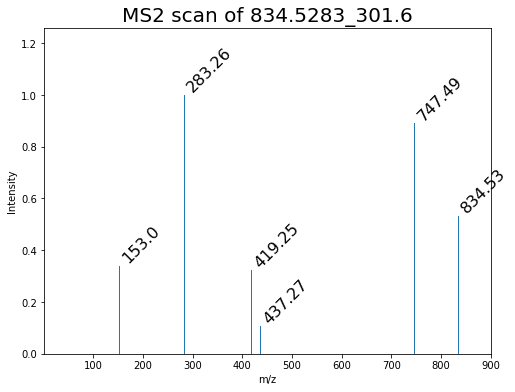

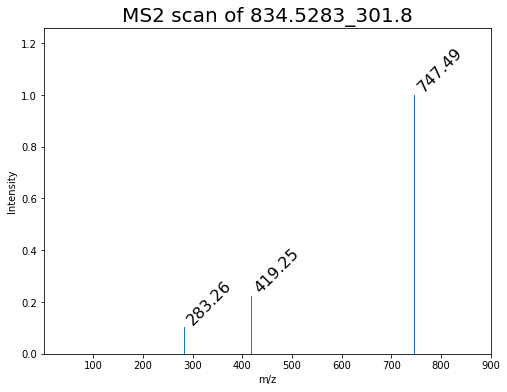

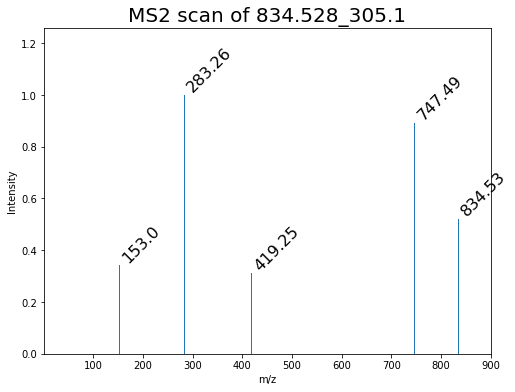

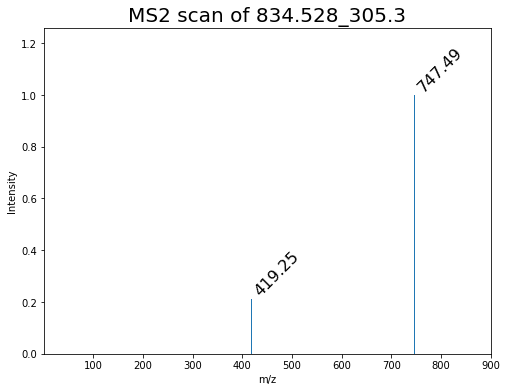

In [24]:
plot_spectra(spectra = res_dict_clean['F13468'])